In [33]:
#importing libreries 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [34]:
df = pd.read_csv(".\iris.data.csv")

In [35]:
df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [36]:
df['class']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object

In [38]:
df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

## **EXPLOTATRY DATA ANALYSIS (EDA)**

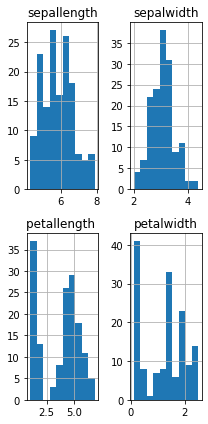

In [39]:
#histogram 
df.hist(figsize = (3,6))
plt.tight_layout()
plt.show()


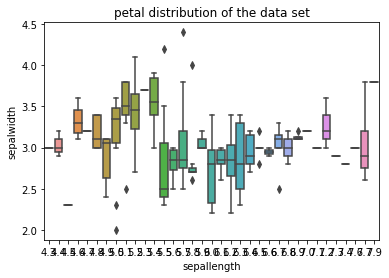

In [40]:
# boxplot chart with seaborn
sns.boxplot( x = 'sepallength', y= "sepalwidth", data = df )
plt.title("petal distribution of the data set")
plt.show()

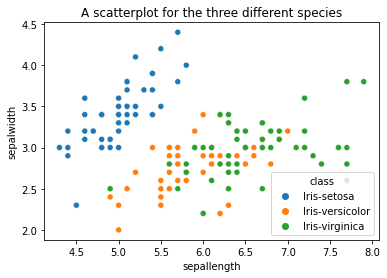

In [41]:
#scatter plot
sns.scatterplot( x = 'sepallength', y = 'sepalwidth', hue = 'class', data =df)
plt.title("A scatterplot for the three different species")
plt.show()

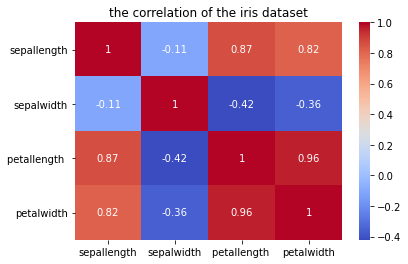

In [42]:
sns.heatmap(df.corr(), annot = True, cmap ="coolwarm")
plt.title("the correlation of the iris dataset")
plt.show()

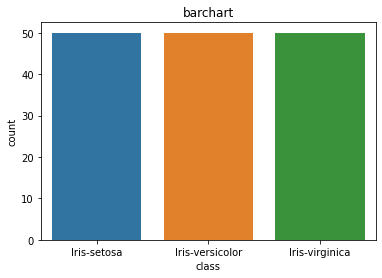

In [43]:
#bar chart this will show the percentage of the class in bar chart
sns.countplot(x ="class", data =df)
plt.title("barchart")
plt.show()

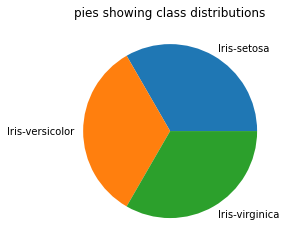

In [44]:
#pie chart this will show the proposotion of the class
plt.pie(df["class"].value_counts(), labels = df["class"].unique()) #, autopct= "%1.1%%")
plt.title("pies showing class distributions")
plt.show()

## **THE MACHINE LEARNING**

**SURPERVISED:**  Classification and Regressiion

**CLASSIFICATION**

NOTE: 

IMPORTING LIBARIES

CHECKING THE CONSISTANCY OF THE DATA

ONE HOT ENCODER

SPLITTING THE DATASET INTO TRAIN_TEST
NORMALIZATION USING STANDARDSCALAR()

BULIDNG THE MODEL -MODEL FITTING

EVALUATE THE MODEL

MODEL PREDICTION 


In [119]:
# importing the libries for the algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LinearRegression
#for building the model 
from sklearn.model_selection import train_test_split
# for preprocessing libries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
#for evaluation  
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [120]:
df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


**preprocessing stage**

In [121]:
#PRINT THE COLUMNS 
df.columns

Index(['sepallength', 'sepalwidth', 'petallength ', 'petalwidth', 'class'], dtype='object')

In [122]:
#preprocesing stages
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder() #initantaite the hot encoder 

X = df[["sepallength", "sepalwidth",  "petallength ", "petalwidth"]]
y = df["class"]

y = encoder.fit_transform(df["class"])
#y_encoded = encoder.fit_transform(df["class"])
y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [123]:
X

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [124]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [125]:
#splittning the dataset
X_train, X_test, y_train, y_test =train_test_split( X, y, test_size = 0.3, random_state = 42)

#dispay the size of the training

X_train.shape, X_test.shape, y_train.shape, y_test.shape
 

((105, 4), (45, 4), (105,), (45,))

In [126]:
#normalizatons
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
#X_train.shape(1, -1)
X_test = scaler.transform(X_test)

In [127]:
#buiding the model 
decision_model = DecisionTreeClassifier()# initantaite the model
decision_model.fit(X_train, y_train) # MODEL FITTING 
y_predict_decision = decision_model.predict(X_test) # MAKING PREDICCTION 


In [128]:
#EVALUTION 
accuracy = accuracy_score(y_test, y_predict_decision)
accuracy

1.0

In [129]:
#classiffication report 
from sklearn import metrics
print(metrics.classification_report(y_test, y_predict_decision))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [130]:
"""from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LinearRegression"""

'from sklearn.ensemble import RandomForestClassifier\nfrom sklearn.neighbors import KNeighborsClassifier \nfrom sklearn.linear_model import LinearRegression'

In [131]:
#INITIZIES MODEL 
randm_model = RandomForestClassifier()
knn_model = KNeighborsClassifier( )
linear_model = LinearRegression()

#FITTING THE MODEL
randm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)
linear_model.fit(X_train, y_train)

#predicting the models
y_pred_randm =randm_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)
y_pred_linear = linear_model.predict(X_test)


In [132]:
randn_acc = accuracy_score(y_test, y_pred_randm )
print(randn_acc)
print("**********")
knn_acc = accuracy_score(y_test,y_pred_knn)
print(knn_acc)
print("******")
#linear_acc = accuracy_score(y_test, y_pred_linear)
#print(linear_acc)

1.0
**********
1.0
******


In [133]:
%pip install ProfileReport

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement ProfileReport
ERROR: No matching distribution found for ProfileReport


In [134]:
#getting filereport 
from pandas_profile import ProfileReport 

ModuleNotFoundError: No module named 'pandas_profile'

In [135]:
ProfileReport(df)

NameError: name 'ProfileReport' is not defined